#### Analyzing Star wars movie survey data:

In this notebook, We trying to clean and analyze the Star wars survey data provided by FiveThirtyEight. As we understand that this data is related to people's perspective about Star Wars sequels. We are going to formulate few questions for us to find out. As our analysis is open-ended, we are going to keep an eye for any interesting insight along our journey. 

For now, let's look at few columns:

- `RespondentID` - An anonymized ID for the respondent (person taking the survey)
- `Gender` - The respondent's gender
- `Age` - The respondent's age
- `Household Income` - The respondent's income
- `Education` - The respondent's education level
- `Location` (Census Region) - The respondent's location
- `Have you seen any of the 6 films in the Star Wars franchise?` - Has a Yes or No response
- `Do you consider yourself to be a fan of the Star Wars film franchise?` - Has a Yes or No response

Now, we have surface understanding of the data. We'll formulate few questions like:
- Q. Most viewed sequels of the Star Wars?
- Q. Which sequel is more popular among the age group?
- Q. What category of people have more tendency to watch all the sequels of Star wars?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/star-wars-survey/StarWars.csv',
                          encoding='ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

In [3]:
df.columns.values

array(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with th

In [4]:
df.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [5]:
df.describe(include='all')

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
count,1.186000e+03,1187,837,674,572,551,608,759,739,836,...,827,829,829,214,1069,1047,1047,859,1037,1044
unique,NaN,3,3,1,1,1,1,1,1,7,...,7,4,3,3,3,3,5,6,6,10
top,NaN,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,No,No,Female,45-60,"$50,000 - $99,999",Some college or Associate degree,East North Central
freq,NaN,936,552,674,572,551,608,759,739,237,...,605,325,615,114,641,549,291,298,328,181
mean,3.290128e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.055639e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.288373e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.289451e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.290147e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.290814e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df[df['RespondentID'].isnull()]

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response


In [99]:
#back-up copy
star_wars_df = df.copy()

In [100]:
df.shape

(1187, 38)

In [101]:
# removing the respondent Id with NaN
star_wars_df = star_wars_df[star_wars_df['RespondentID'].notnull()]
star_wars_df.shape

(1186, 38)

In [102]:
star_wars_df['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

There are no missing values in this column.

In [103]:
star_wars_df['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

We can see there are 284 missing values in this columns.

Let's map the 'Yes' & 'No' value to 'True' & 'False'. This will make you working with pandas lot easier. You can work as it is if you prefer.

In [104]:
yes_no_map = { 'Yes': True, 'No':False}

In [105]:
star_wars_df['Have you seen any of the 6 films in the Star Wars franchise?'] = \
    star_wars_df['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no_map)
star_wars_df['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [106]:
star_wars_df['Do you consider yourself to be a fan of the Star Wars film franchise?'] = \
star_wars_df['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no_map)
star_wars_df['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [107]:
star_wars_df.columns.values

array(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with th

In [108]:
star_wars_df['Unnamed: 4'].value_counts()

Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64

###### Change the column names
Here, multiple choice questions are represented by using questions as well as first choose by first columns and remaining options using consecutive `Unnamed: ` columns.

For example, let's us look into the first question.

In [109]:
star_wars_df.iloc[:,3:9][:3]

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN


In [110]:
questions_1 = {
'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
    'Unnamed: 4':'seen_2', 
    'Unnamed: 5':'seen_3', 
    'Unnamed: 6':'seen_4', 
    'Unnamed: 7':'seen_5',
    'Unnamed: 8':'seen_6'}

In [111]:
for col in star_wars_df.columns.values[3:9]:
    print(f'{col} = > {questions_1[col]}')

Which of the following Star Wars films have you seen? Please select all that apply. = > seen_1
Unnamed: 4 = > seen_2
Unnamed: 5 = > seen_3
Unnamed: 6 = > seen_4
Unnamed: 7 = > seen_5
Unnamed: 8 = > seen_6


In [112]:
star_wars_df.columns.values[3:9]

array(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8'], dtype=object)

In [113]:
for col in star_wars_df.columns.values[3:9]:
    star_wars_df = star_wars_df.rename(columns={col:questions_1[col]})

In [114]:
star_wars_df.columns.values[3:9]

array(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'],
      dtype=object)

Let's change the columns values as True and False. `True` if the person has watched the movie and `False` if the person has not.

`{
"Star Wars: Episode I  The Phantom Menace": True,
    np.NaN: False
}`

In [115]:
print('Before mapping the values of the columns')
print('')
for col in star_wars_df.columns.values[3:9]:
    print(star_wars_df[col].value_counts())
    print('')

Before mapping the values of the columns

Star Wars: Episode I  The Phantom Menace    673
Name: seen_1, dtype: int64

Star Wars: Episode II  Attack of the Clones    571
Name: seen_2, dtype: int64

Star Wars: Episode III  Revenge of the Sith    550
Name: seen_3, dtype: int64

Star Wars: Episode IV  A New Hope    607
Name: seen_4, dtype: int64

Star Wars: Episode V The Empire Strikes Back    758
Name: seen_5, dtype: int64

Star Wars: Episode VI Return of the Jedi    738
Name: seen_6, dtype: int64



In [116]:
#let's make the mapping dictionary for each one
# here seen_1 means watched the Star Wars: Episode I. 
# Reminder: boolean values this makes our analysis easier
# due to the behaviour of pandas to Boolean values.
watched_dict = {'seen_1':{
    "Star Wars: Episode I  The Phantom Menace": True,
    np.NaN: False
},

'seen_2':{
    "Star Wars: Episode II  Attack of the Clones": True,
    np.NaN: False
},

'seen_3':{
    "Star Wars: Episode III  Revenge of the Sith": True,
    np.NaN: False
},

'seen_4':{
    "Star Wars: Episode IV  A New Hope": True,
    np.NaN: False
},

'seen_5':{
    "Star Wars: Episode V The Empire Strikes Back": True,
    np.NaN: False
},

'seen_6':{
    "Star Wars: Episode VI Return of the Jedi": True,
    np.NaN: False
}
               }

In [117]:
for key,value in watched_dict.items():
    print(key)
    print(value)
    print('')

seen_1
{'Star Wars: Episode I  The Phantom Menace': True, nan: False}

seen_2
{'Star Wars: Episode II  Attack of the Clones': True, nan: False}

seen_3
{'Star Wars: Episode III  Revenge of the Sith': True, nan: False}

seen_4
{'Star Wars: Episode IV  A New Hope': True, nan: False}

seen_5
{'Star Wars: Episode V The Empire Strikes Back': True, nan: False}

seen_6
{'Star Wars: Episode VI Return of the Jedi': True, nan: False}



In [118]:
watched_dict['seen_1']

{'Star Wars: Episode I  The Phantom Menace': True, nan: False}

In [119]:
for col in star_wars_df.columns.values[3:9]:
    star_wars_df[col] = star_wars_df[col].map(watched_dict[col])

In [120]:
print('After mapping the values of the columns')
print('')
for col in star_wars_df.columns.values[3:9]:
    print(star_wars_df[col].value_counts())
    print('')

After mapping the values of the columns

True     673
False    513
Name: seen_1, dtype: int64

False    615
True     571
Name: seen_2, dtype: int64

False    636
True     550
Name: seen_3, dtype: int64

True     607
False    579
Name: seen_4, dtype: int64

True     758
False    428
Name: seen_5, dtype: int64

True     738
False    448
Name: seen_6, dtype: int64



Lets do the same for the next question about peopel's opinion about the Sequels.

In [121]:
for col in star_wars_df.columns[9:15]:
    print(col)

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.
Unnamed: 10
Unnamed: 11
Unnamed: 12
Unnamed: 13
Unnamed: 14


In [122]:
# change the ranking to numeric
star_wars_df[star_wars_df.columns[9:15]] = \
            star_wars_df[star_wars_df.columns[9:15]].astype(float)

In [123]:
star_wars_df.columns.values[9:15]

array(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'], dtype=object)

In [124]:
question_2 = {
'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
    'Unnamed: 10':'ranking_2', 
    'Unnamed: 11':'ranking_3', 
    'Unnamed: 12':'ranking_4', 
    'Unnamed: 13':'ranking_5',
    'Unnamed: 14':'ranking_6'}

In [125]:
for col in star_wars_df.columns.values[9:15]:
    star_wars_df = star_wars_df.rename(columns={col:question_2[col]})
    
star_wars_df.columns[9:15]

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

###### Find the highest-Ranked Movie

In [126]:
ranking_mean =star_wars_df[star_wars_df.columns.values[9:15]].mean()

In [127]:
ranking_mean.index

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

In [128]:
ranking_mean.values

array([3.73293413, 4.08732057, 4.34131737, 3.27272727, 2.51315789,
       3.04784689])

In [129]:
import matplotlib.pyplot as plt

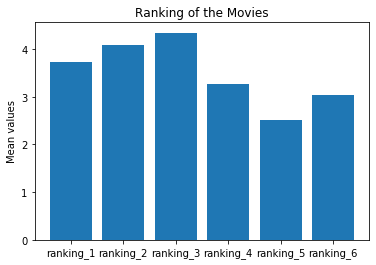

In [130]:
plt.bar(ranking_mean.index,ranking_mean.values)
plt.title('Ranking of the Movies')
plt.ylabel('Mean values')
plt.show()

In [137]:
# putting all the keys & values in the list
key_list =list(question_2.keys())
val_list = list(question_2.values())
# extracting the key based upon the value
key_list[val_list.index('ranking_1')]

'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.'

So, lower ranking here means ranked higher in favorite list. This means, `Star Wars: Episode V` is most liked movie in the sequel.

In [139]:
watched_dict['seen_5']

{'Star Wars: Episode V The Empire Strikes Back': True, nan: False}

###### Finding The Most Viewed Movie

In [45]:
popular_movies = star_wars_df[star_wars_df.columns[3:9]].sum()
popular_movies

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

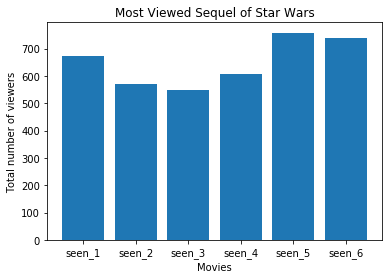

In [56]:
plt.bar(popular_movies.index,popular_movies.values)
plt.title('Most Viewed Sequel of Star Wars')
plt.ylabel('Total number of viewers')
plt.xlabel('Movies')
plt.show()

In [89]:
watched_dict['seen_5'],watched_dict['seen_3']

({'Star Wars: Episode V The Empire Strikes Back': True, nan: False},
 {'Star Wars: Episode III  Revenge of the Sith': True, nan: False})

`Star Wars: Episode V The Empire Strikes Back` is the most viewed sequel of Star Wars whereas `Star Wars: Episode III Revenge of the Sith` is the least viewed among the them.

###### Exploring the Data by Binary Segments
Let's grind our analysis further by sex. 

In [47]:
males_df = star_wars_df[star_wars_df["Gender"] == "Male"]
females_df = star_wars_df[star_wars_df["Gender"] == "Female"]

In [48]:
ranking_male =males_df[males_df.columns.values[9:15]].mean()
ranking_female =females_df[females_df.columns.values[9:15]].mean()

In [159]:
# you can see there are 74 mising values on each columns expect 
# for Episode 3 which has one extra
males_df.iloc[:,9:15].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 1 to 1178
Data columns (total 6 columns):
ranking_1    423 non-null float64
ranking_2    423 non-null float64
ranking_3    422 non-null float64
ranking_4    423 non-null float64
ranking_5    423 non-null float64
ranking_6    423 non-null float64
dtypes: float64(6)
memory usage: 27.2 KB


In [160]:
# you can see there are 152 mising values on each columns expect 
# for Episode 1 which has one extra
females_df.iloc[:,9:15].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 112 to 1186
Data columns (total 6 columns):
ranking_1    396 non-null float64
ranking_2    397 non-null float64
ranking_3    397 non-null float64
ranking_4    397 non-null float64
ranking_5    397 non-null float64
ranking_6    397 non-null float64
dtypes: float64(6)
memory usage: 30.0 KB


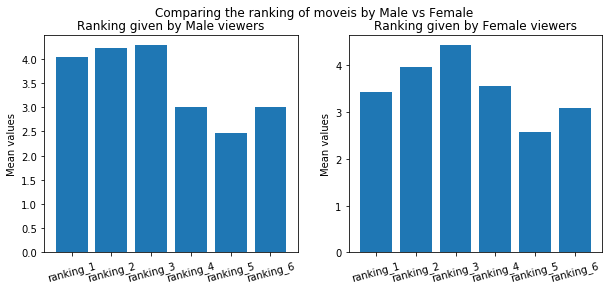

In [49]:
# plotting both the male and female 
plt.figure(figsize=(10,4))
plt.suptitle('Comparing the ranking of moveis by Male vs Female')

plt.subplot(1,2,1)
plt.bar(ranking_male.index,ranking_male.values)
plt.title('Ranking given by Male viewers')
plt.xticks(rotation=15)
plt.ylabel('Mean values')

plt.subplot(1,2,2)
plt.bar(ranking_female.index,ranking_female.values)
plt.title('Ranking given by Female viewers')
plt.xticks(rotation=15)
plt.ylabel('Mean values')

plt.show()

In [163]:
ranking_male,ranking_female

(ranking_1    4.037825
 ranking_2    4.224586
 ranking_3    4.274882
 ranking_4    2.997636
 ranking_5    2.458629
 ranking_6    3.002364
 dtype: float64, ranking_1    3.429293
 ranking_2    3.954660
 ranking_3    4.418136
 ranking_4    3.544081
 ranking_5    2.569270
 ranking_6    3.078086
 dtype: float64)

We see, exact same behaviour from both parties Episode V was no-brainer to be the most liked. But there is close battle for second and third place, majority of female group thinks Episode VI as the second while Episode IV wins the second place in male's opinion.

For bottom 3 there is close race in male's category while there is distinct difference among them in the female's.

Note: Lower values means higher rank.

In [50]:
popular_view_by_male =males_df[males_df.columns.values[3:9]].sum()
popular_view_by_female =females_df[females_df.columns.values[3:9]].sum()

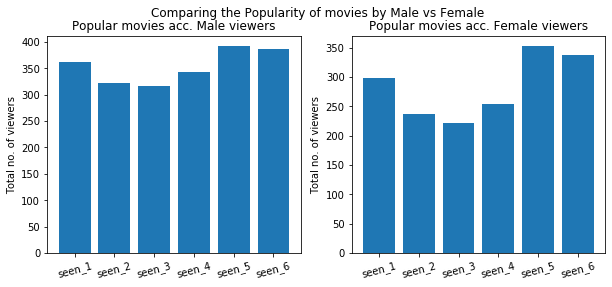

In [164]:
# plotting both the male and female 
plt.figure(figsize=(10,4))
plt.suptitle('Comparing the Popularity of movies by Male vs Female')

plt.subplot(1,2,1)
plt.bar(popular_view_by_male.index,popular_view_by_male.values)
plt.title('Popular movies acc. Male viewers')
plt.xticks(rotation=15)
plt.ylabel('Total no. of viewers')

plt.subplot(1,2,2)
plt.bar(popular_view_by_female.index,popular_view_by_female.values)
plt.title('Popular movies acc. Female viewers')
plt.xticks(rotation=15)
plt.ylabel('Total no. of viewers')

plt.show()

Most watched movie undoubtedly is Episode V while least watched is Episode III according the data. Atleast,that's what the Survey data suggests here.

###### Next Steps

Potential next steps:
- Segmenting the data based on columns like `Education`,`Location`,`Household Income` see the different result we have obtained now.

- Categories the age group and see if there is any relationship with the movies sequels.
  
- Clustering the data to understand the relationship between different respondent.

In [165]:
star_wars_df['Education'].value_counts(dropna=False)

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
NaN                                 150
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

In [167]:
star_wars_df['Location (Census Region)'].value_counts(dropna=False)

East North Central    181
Pacific               175
South Atlantic        170
NaN                   143
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Name: Location (Census Region), dtype: int64

In [172]:
star_wars_df['Household Income'].value_counts(dropna=False)

NaN                    328
$50,000 - $99,999      298
$25,000 - $49,999      186
$100,000 - $149,999    141
$0 - $24,999           138
$150,000+               95
Name: Household Income, dtype: int64

In [177]:
star_wars_df['Age'].value_counts(dropna=False)

45-60    291
> 60     269
30-44    268
18-29    218
NaN      140
Name: Age, dtype: int64

Now, let's investigate the people's liking of the sequels based upon the `Age` and `Education`.

In [186]:
df_age = star_wars_df.groupby(by=['Age']).mean()
df_age

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
Age,,,,,,,,,,,,,,
18-29,3.290464e+09,0.825688,0.733945,0.678899,0.665138,0.697248,0.733945,0.733945,4.100000,4.100000,3.966667,2.994444,2.722222,3.116667
30-44,3.290218e+09,0.772388,0.652985,0.589552,0.567164,0.656716,0.735075,0.735075,4.347826,4.309179,4.475728,2.932367,2.212560,2.714976
45-60,3.289923e+09,0.824742,0.621993,0.508591,0.487973,0.567010,0.756014,0.721649,3.541667,4.170833,4.537500,3.308333,2.437500,3.004167
> 60,3.290001e+09,0.717472,0.531599,0.394052,0.371747,0.386617,0.624535,0.587361,3.010417,3.761658,4.316062,3.808290,2.730570,3.357513


In [243]:
# color mapping
clr_mapping = ['skyblue','peachpuff','lightgreen','salmon','grey',
         'wheat']

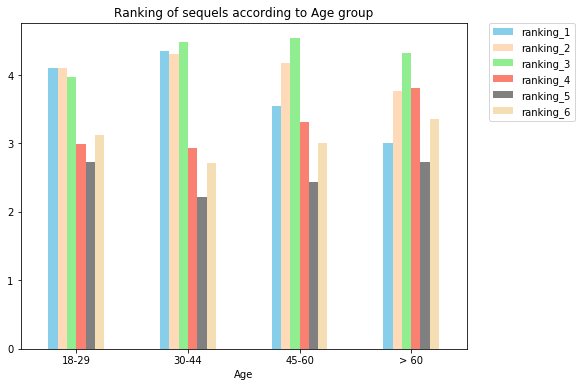

In [244]:
# color mapping
# clr_mapping = ['skyblue','peachpuff','lightgreen','salmon','lightcyan',
#          'wheat']

df_age.iloc[:,8:].plot.bar(rot=0,figsize=(8,6),
                        title='Ranking of sequels according to Age group',
                          color=clr_mapping)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,
          fontsize=10)
plt.show()

Younger people like first two Episode more than the rest while Epiosde III is most liked by elder people. Surprisingly, Episode V which is most liked on average by people is least liked by all age group.

In [217]:
df_eduction = star_wars_df.groupby(by=['Education']).mean()
df_eduction

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
Education,,,,,,,,,,,,,,
Bachelor degree,3.290151e+09,0.816199,0.641745,0.529595,0.507788,0.607477,0.757009,0.728972,3.828244,4.290076,4.521073,3.114504,2.309160,2.931298
Graduate degree,3.289917e+09,0.821818,0.650909,0.541818,0.505455,0.592727,0.752727,0.730909,3.822222,4.225664,4.500000,3.199115,2.323009,2.920354
High school degree,3.290433e+09,0.676190,0.542857,0.457143,0.457143,0.504762,0.580952,0.571429,3.802817,3.746479,4.126761,3.211268,2.873239,3.239437
Less than high school degree,3.289831e+09,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,5.000000,5.333333,3.666667,2.666667,1.000000,3.333333
Some college or Associate degree,3.290179e+09,0.774390,0.643293,0.567073,0.557927,0.548780,0.692073,0.679878,3.551181,3.885827,4.102362,3.503937,2.783465,3.173228


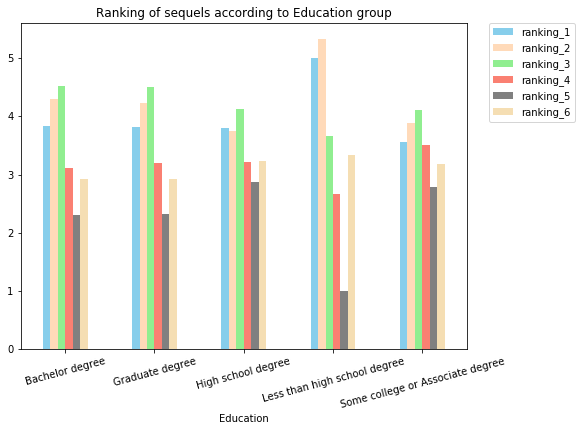

In [245]:
# color mapping
# clr_mapping = ['skyblue','peachpuff','lightgreen','salmon','lightcyan',
#          'wheat']

df_eduction.iloc[:,8:].plot.bar(rot=15,figsize=(8,6),
                        title='Ranking of sequels according to Education group',
                          color=clr_mapping)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,
          fontsize=10)
plt.show()

Similarly, here as well, Episode V is least liked by each individual education group. Out of Five groups, four of the group voted episode III as the most liked Star Wars sequel.

In [220]:
df_location = star_wars_df.groupby(by=['Location (Census Region)']).mean()
df_location

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
Location (Census Region),,,,,,,,,,,,,,
East North Central,3.290208e+09,0.740331,0.563536,0.491713,0.491713,0.524862,0.707182,0.668508,3.723881,4.074627,4.410448,3.358209,2.373134,3.059701
East South Central,3.290230e+09,0.842105,0.631579,0.552632,0.552632,0.710526,0.815789,0.763158,3.875000,4.593750,4.375000,2.875000,2.250000,3.031250
Middle Atlantic,3.290092e+09,0.762295,0.647541,0.565574,0.573770,0.622951,0.680328,0.696721,3.924731,4.215054,4.413043,3.064516,2.440860,2.924731
Mountain,3.290069e+09,0.860759,0.721519,0.594937,0.582278,0.683544,0.772152,0.746835,4.000000,4.000000,4.279412,2.970588,2.794118,2.955882
New England,3.290039e+09,0.800000,0.666667,0.586667,0.573333,0.640000,0.733333,0.720000,4.203390,4.166667,4.133333,3.083333,2.516667,2.866667
Pacific,3.290092e+09,0.834286,0.685714,0.565714,0.525714,0.600000,0.702857,0.708571,3.582192,3.821918,4.171233,3.219178,2.739726,3.465753
South Atlantic,3.290179e+09,0.782353,0.611765,0.482353,0.464706,0.547059,0.735294,0.705882,3.684211,4.180451,4.443609,3.406015,2.398496,2.887218
West North Central,3.290312e+09,0.817204,0.655914,0.548387,0.526882,0.526882,0.720430,0.677419,3.671053,4.105263,4.355263,3.368421,2.552632,2.947368
West South Central,3.289979e+09,0.690909,0.563636,0.527273,0.454545,0.445455,0.636364,0.627273,3.394737,4.118421,4.473684,3.657895,2.421053,2.934211


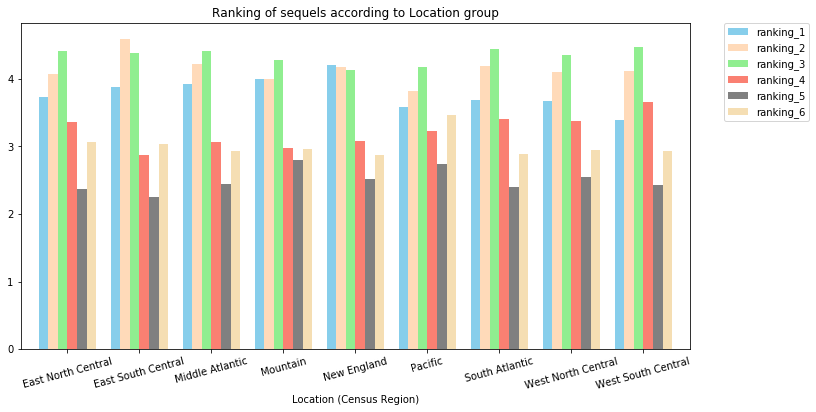

In [246]:
# color mapping
clr_mapping = ['skyblue','peachpuff','lightgreen','salmon','grey',
         'wheat']

df_location.iloc[:,8:].plot.bar(rot=15,figsize=(12,6),
                        title='Ranking of sequels according to Location group',
                          color=clr_mapping,
                               width=0.8)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,
          fontsize=10)
plt.show()

###### Final Step:
We would be experimenting with unsupervised learning: different clustering algorithms and see if there is any interesting things going aroung.